In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# create dataframe from dataset 
df = pd.read_csv('toy_dataset.csv')

In [5]:
# first 5 rows of dataframe
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
Number     150000 non-null int64
City       150000 non-null object
Gender     150000 non-null object
Age        150000 non-null int64
Income     150000 non-null float64
Illness    150000 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [7]:
# Convert the categorial features into numerical
df['Male'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['Illness'] = df['Illness'].apply(lambda x: 1 if x =='Yes' else 0)

In [8]:
# remove old categorical feature
df.drop('Gender',axis=1,inplace=True)

In [9]:
# Convert the categorial features into numerical
cities = pd.get_dummies(df['City'],drop_first=True)

In [10]:
# create new dataframe from old dataframe and new dummy features
df_new = pd.concat([df,cities],axis=1)

In [11]:
# remove old categorical feature
df_new.drop('City',axis=1,inplace=True)

In [12]:
# since theres more than 2 features, let's use principle components by importing it
from sklearn.decomposition import PCA

In [13]:
# create an instance of principle component analysis with 2 components
pca = PCA(n_components=2)

In [14]:
# convert the dataframe into 2 principle components
components = pca.fit_transform(df_new)

In [15]:
# create new dataframe for the principle components and column names
df2d = pd.DataFrame(data=components,columns=['PCA1','PCA2'])

In [16]:
# import K Means Clustering 
from sklearn.cluster import KMeans

In [17]:
# initialise the model and choose how many clusters we're looking for, 3 has been chosen arbitrarily
clusters = KMeans(n_clusters=3)

In [18]:
# fit the model to the principle components dataframe
clusters.fit(df2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

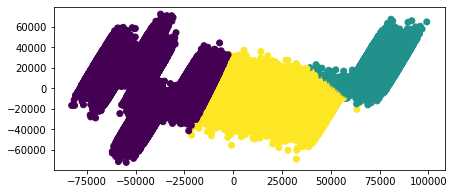

In [19]:
# plot the points from the principle components dataframe on a scatter plot and colour the clusters according predicted labels
fig = plt.figure(figsize=(7,3))
plt.scatter(x=df2d['PCA1'],y=df2d['PCA2'],c=clusters.labels_)